# Data Understanding

### Import library

In [1]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


###  Loading Data

In [3]:
path = "/content/drive/MyDrive/Dataset PML/ratings.csv" #Rating
load_data = pd.read_csv(path)

path2 = "/content/drive/MyDrive/Dataset PML/movies.csv" #Movie
load_data2 = pd.read_csv(path2)


### Membuat data frame rating

In [4]:
df = pd.DataFrame(load_data)
df.head()

,userId,movieId,rating,timestamp
0,1,169,2.5,1204927694
1,1,2471,3.0,1204927438
2,1,48516,5.0,1204927435
3,2,2571,3.5,1436165433
4,2,109487,4.0,1436165496


### Membuat data frame movie

In [5]:
df2 = pd.DataFrame(load_data2)
df2.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Univariate Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 698.4 MB


Data yang diambil dari 22 juta lebih hanya 200.000 data agar komputasi tidak berat

In [7]:
df = df.drop(df.index[200000:])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     200000 non-null  int64  
 1   movieId    200000 non-null  int64  
 2   rating     200000 non-null  float64
 3   timestamp  200000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 6.1 MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
dtypes: int64(1), object(2)
memory usage: 801.9+ KB


### Mencari rating terendah

In [10]:
df.rating.min()

0.5

### Mencari rating tertinggi

In [11]:
df.rating.max()

5.0

### Melihat sebaran rating

In [52]:
# Melihat sebran rating

df['rating'].value_counts()


4.0    52977
3.0    40870
5.0    30292
3.5    22275
4.5    15504
2.0    15070
2.5     9765
1.0     7564
1.5     3005
0.5     2678
Name: rating, dtype: int64

In [13]:
print('Jumlah penonton film: ', len(df.userId.unique()))
print('Jumlah film: ', len(df.movieId.unique()))
print('Jumlah genre: ', len(df2.genres.unique()))

Jumlah penonton film:  2206
Jumlah film:  11137
Jumlah genre:  1446


In [14]:
# untuk pengecekan tipe genre akan dilakukan kembali saat data sudah displiting pada tahap data prepration

print('Tipe genre: ', df2.genres.unique())

Tipe genre:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' ...
 'Action|Comedy|Romance|Sci-Fi|Thriller' 'Action|Animation|Romance'
 'Action|Adventure|Thriller|Western']


### Membuat histogram

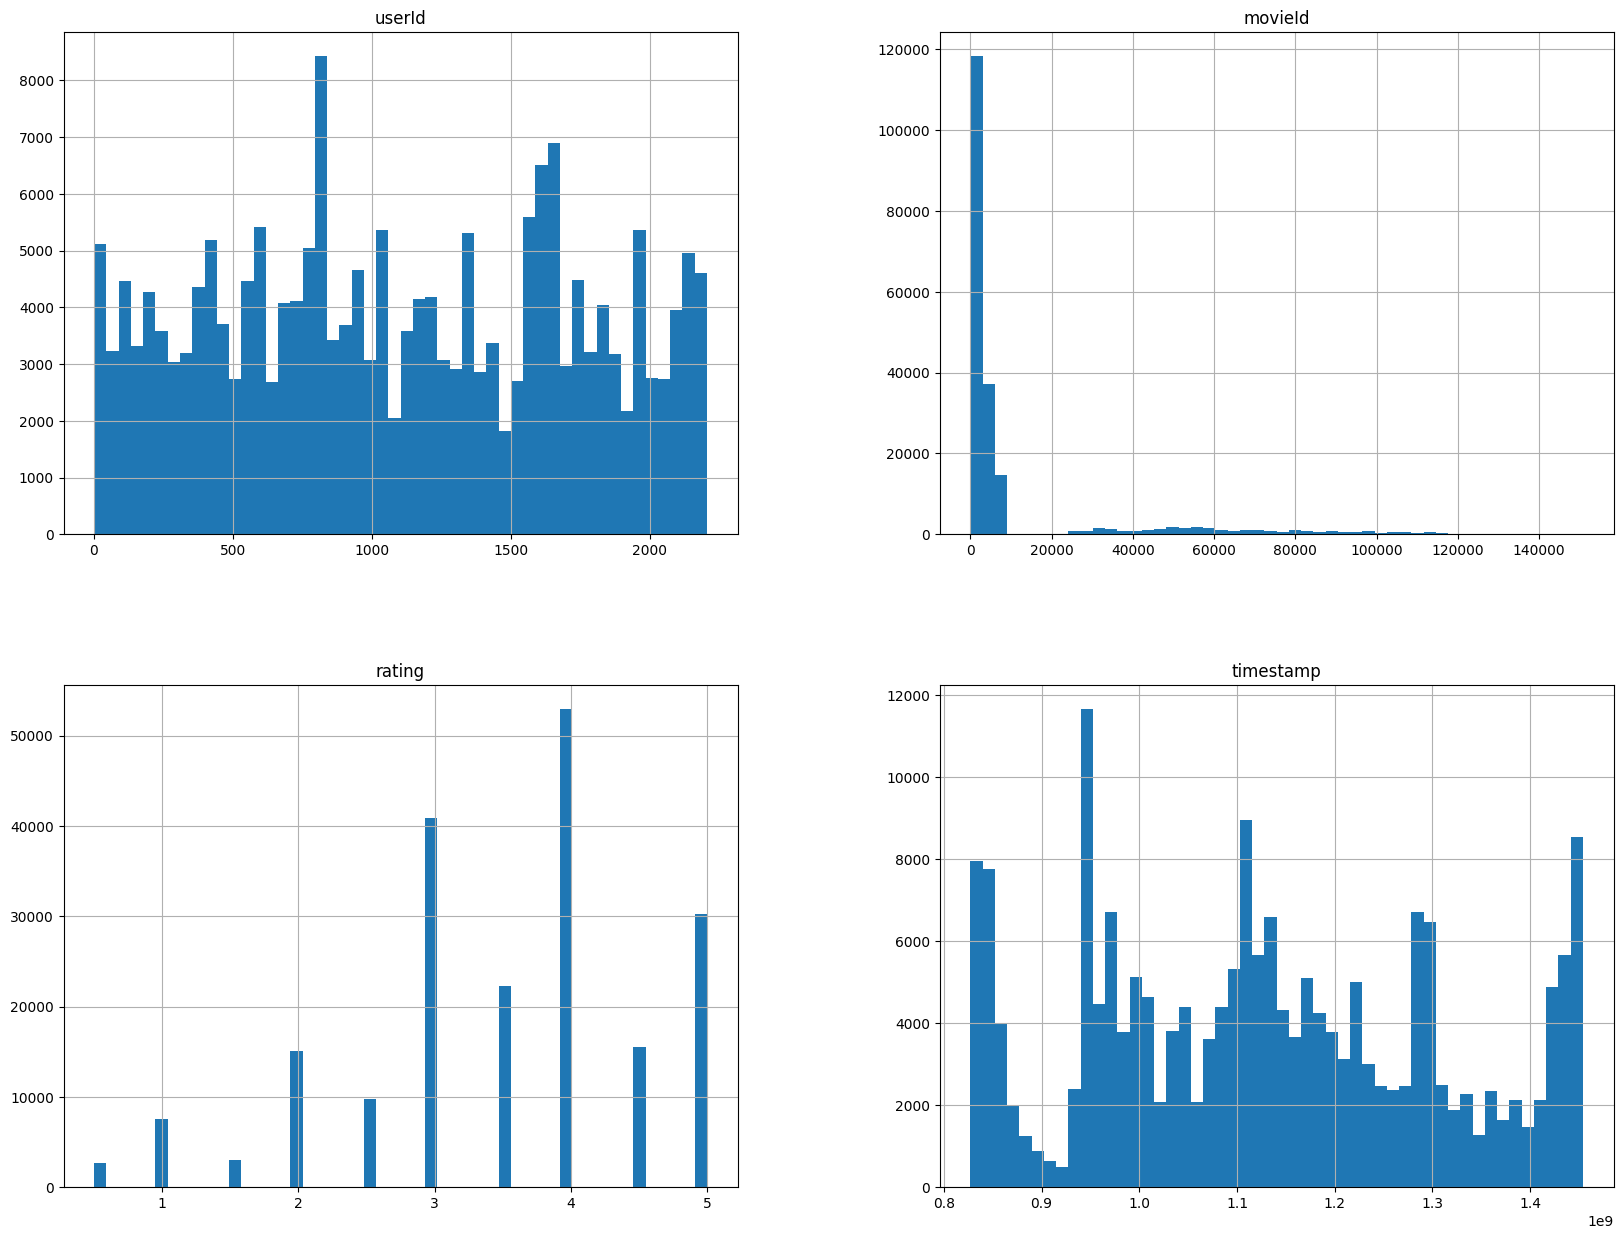

In [49]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [65]:
df2[df2.title.eq('Forrest Gump (1994)')]


,movieId,title,genres
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [66]:
df2[df2.title.eq('Pulp Fiction (1994)')]

,movieId,title,genres
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [67]:
df2[df2.title.eq('Silence of the Lambs, The (1991)')]

,movieId,title,genres
587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller


In [68]:
df2[df2.title.eq('Shawshank Redemption, The (1994)')]

,movieId,title,genres
315,318,"Shawshank Redemption, The (1994)",Crime|Drama


In [69]:

df2[df2.title.eq('Jurassic Park (1993)')]

,movieId,title,genres
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


# Data Preparation

### Menggabungkan dataframe rating dengan movie berdasarkan nilai movieId

In [15]:
movie = pd.merge(df, df2 , on='movieId', how='left')
movie

,userId,movieId,rating,timestamp,title,genres
0,1,169,2.5,1204927694,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
1,1,2471,3.0,1204927438,Crocodile Dundee II (1988),Action|Adventure|Comedy
2,1,48516,5.0,1204927435,"Departed, The (2006)",Crime|Drama|Thriller
3,2,2571,3.5,1436165433,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4,2,109487,4.0,1436165496,Interstellar (2014),Sci-Fi|IMAX
...,...,...,...,...,...,...
199995,2206,26222,3.5,1196960554,Dodes'ka-den (Clickety-Clack) (1970),Drama|Fantasy
199996,2206,27362,3.5,1196961040,"Sometimes Happiness, Sometimes Sorrow (Kabhi K...",Drama|Musical|Romance
199997,2206,27397,3.5,1196960631,Joint Security Area (Gongdong gyeongbi guyeok ...,Crime|Drama|Mystery|Thriller|War
199998,2206,27523,3.5,1196960817,My Sassy Girl (Yeopgijeogin geunyeo) (2001),Comedy|Romance


In [16]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     200000 non-null  int64  
 1   movieId    200000 non-null  int64  
 2   rating     200000 non-null  float64
 3   timestamp  200000 non-null  int64  
 4   title      200000 non-null  object 
 5   genres     200000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 10.7+ MB


In [17]:
# Mencari 5 film yang paling banyak ditonton, {EDA dilakukan pada tahap prepration karena harus menggunkan data yang telah di merge}

movie['title'].value_counts()

Forrest Gump (1994)                 734
Pulp Fiction (1994)                 700
Silence of the Lambs, The (1991)    681
Shawshank Redemption, The (1994)    677
Jurassic Park (1993)                611
                                   ... 
What If (2013)                        1
I Was a Teenage Zombie (1987)         1
Joy of Sex (1984)                     1
Just One of the Girls (1993)          1
Two for the Road (1967)               1
Name: title, Length: 11135, dtype: int64

### Cek missing value dengan fungsi isnull()

In [18]:
movie.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

### Melakukan splitting string

In [19]:
# Membuat agar setiap film hanya mempunyai 1 genre

split_columns = movie['genres'].str.split('|', expand=True)

# Menambahkan hasil split sebagai kolom baru ke DataFrame

movie = pd.concat([movie, split_columns], axis=1)


In [20]:
# Menampilkan DataFrame setelah split string

movie.head()

,userId,movieId,rating,timestamp,title,genres,0,1,2,3,4,5,6,7,8,9
0,1,169,2.5,1204927694,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama,Adventure,Children,Drama,None,None,None,None,None,None,None
1,1,2471,3.0,1204927438,Crocodile Dundee II (1988),Action|Adventure|Comedy,Action,Adventure,Comedy,None,None,None,None,None,None,None
2,1,48516,5.0,1204927435,"Departed, The (2006)",Crime|Drama|Thriller,Crime,Drama,Thriller,None,None,None,None,None,None,None
3,2,2571,3.5,1436165433,"Matrix, The (1999)",Action|Sci-Fi|Thriller,Action,Sci-Fi,Thriller,None,None,None,None,None,None,None
4,2,109487,4.0,1436165496,Interstellar (2014),Sci-Fi|IMAX,Sci-Fi,IMAX,None,None,None,None,None,None,None,None


In [21]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     200000 non-null  int64  
 1   movieId    200000 non-null  int64  
 2   rating     200000 non-null  float64
 3   timestamp  200000 non-null  int64  
 4   title      200000 non-null  object 
 5   genres     200000 non-null  object 
 6   0          200000 non-null  object 
 7   1          166730 non-null  object 
 8   2          107763 non-null  object 
 9   3          44489 non-null   object 
 10  4          13240 non-null   object 
 11  5          3030 non-null    object 
 12  6          624 non-null     object 
 13  7          6 non-null       object 
 14  8          3 non-null       object 
 15  9          3 non-null       object 
dtypes: float64(1), int64(3), object(12)
memory usage: 25.9+ MB


### Dropping Fitur

In [22]:
# Menghapus kolom yang tidak akan digunakan

movie_drop = movie.drop(['timestamp', 'genres', 1, 2, 3, 4, 5, 6, 7, 8, 9], axis=1)

In [23]:
movie_drop.head()

,userId,movieId,rating,title,0
0,1,169,2.5,Free Willy 2: The Adventure Home (1995),Adventure
1,1,2471,3.0,Crocodile Dundee II (1988),Action
2,1,48516,5.0,"Departed, The (2006)",Crime
3,2,2571,3.5,"Matrix, The (1999)",Action
4,2,109487,4.0,Interstellar (2014),Sci-Fi


### Rename fitur

In [24]:
# Merubah nama kolom 0 menjadi genres

movie_rename = movie_drop.rename(columns={0: 'genres'})

In [25]:
movie_rename.head()

,userId,movieId,rating,title,genres
0,1,169,2.5,Free Willy 2: The Adventure Home (1995),Adventure
1,1,2471,3.0,Crocodile Dundee II (1988),Action
2,1,48516,5.0,"Departed, The (2006)",Crime
3,2,2571,3.5,"Matrix, The (1999)",Action
4,2,109487,4.0,Interstellar (2014),Sci-Fi


### Sorting fitur

In [26]:
data_movie = movie_rename

# Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel data_movie

data_movie =   data_movie.sort_values('movieId', ascending=True)
data_movie.head()

,userId,movieId,rating,title,genres
69218,769,1,3.0,Toy Story (1995),Adventure
114126,1223,1,4.0,Toy Story (1995),Adventure
114150,1225,1,1.0,Toy Story (1995),Adventure
38657,432,1,4.0,Toy Story (1995),Adventure
170526,1858,1,3.0,Toy Story (1995),Adventure


### Mengecek berapa jumlah data_movie

In [27]:
len(data_movie.movieId.unique())

11137

### Mengecek kategori movie yang unik

In [28]:
data_movie.genres.unique()

array(['Adventure', 'Comedy', 'Action', 'Drama', 'Crime', 'Children',
       'Mystery', 'Documentary', 'Animation', 'Thriller', 'Horror',
       'Fantasy', 'Film-Noir', 'Western', 'Romance', 'Sci-Fi', 'Musical',
       'War', '(no genres listed)'], dtype=object)

### Mengecek kategori movie

In [29]:
data_movie[data_movie['title'] == 'Toy Story (1995)']

,userId,movieId,rating,title,genres
69218,769,1,3.0,Toy Story (1995),Adventure
114126,1223,1,4.0,Toy Story (1995),Adventure
114150,1225,1,1.0,Toy Story (1995),Adventure
38657,432,1,4.0,Toy Story (1995),Adventure
170526,1858,1,3.0,Toy Story (1995),Adventure
...,...,...,...,...,...
12034,122,1,4.5,Toy Story (1995),Adventure
188753,2108,1,4.0,Toy Story (1995),Adventure
97622,1041,1,3.0,Toy Story (1995),Adventure
96689,1040,1,3.0,Toy Story (1995),Adventure


### Membuat variabel preparation yang berisi dataframe data_movie kemudian mengurutkan berdasarkan movieId

In [30]:
preparation = data_movie
preparation.sort_values('movieId')

,userId,movieId,rating,title,genres
69218,769,1,3.0,Toy Story (1995),Adventure
92843,986,1,3.5,Toy Story (1995),Adventure
191789,2128,1,3.0,Toy Story (1995),Adventure
13876,150,1,4.0,Toy Story (1995),Adventure
91247,967,1,4.0,Toy Story (1995),Adventure
...,...,...,...,...,...
105165,1130,149739,2.0,Nintendo Quest (2015),Documentary
105313,1132,150548,4.0,Sherlock: The Abominable Bride (2016),Action
53415,598,150548,4.5,Sherlock: The Abominable Bride (2016),Action
134798,1502,150776,3.0,Tag (2015),Horror


### Membuang data duplikat pada variabel preparation

In [31]:
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,title,genres
69218,769,1,3.0,Toy Story (1995),Adventure
120254,1317,2,1.0,Jumanji (1995),Adventure
109674,1180,3,3.0,Grumpier Old Men (1995),Comedy
177939,1953,4,1.0,Waiting to Exhale (1995),Comedy
126293,1382,5,4.0,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...
141129,1573,149650,5.0,Childhood's End (2015),Drama
105165,1130,149739,2.0,Nintendo Quest (2015),Documentary
105313,1132,150548,4.0,Sherlock: The Abominable Bride (2016),Action
134798,1502,150776,3.0,Tag (2015),Horror


### Konversi data

In [32]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
name_movie = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
genres = preparation['genres'].tolist()

print(len(movie_id))
print(len(name_movie))
print(len(genres))

11137
11137
11137


In [33]:
# Membuat dictionary untuk data ‘movie_id’, ‘title’, dan ‘genres’
movie_new = pd.DataFrame({
    'id': movie_id,
    'name_movie': name_movie,
    'genres': genres
})
movie_new

,id,name_movie,genres
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
11132,149650,Childhood's End (2015),Drama
11133,149739,Nintendo Quest (2015),Documentary
11134,150548,Sherlock: The Abominable Bride (2016),Action
11135,150776,Tag (2015),Horror


# Model Development dengan Content Based Filtering

### Mengambil 5 sampel

In [34]:
data = movie_new
data.sample(5)

,id,name_movie,genres
7014,31930,Masculin Féminin (1966),Drama
6274,8795,Musa the Warrior (Musa) (2001),Action
8007,55269,"Darjeeling Limited, The (2007)",Adventure
1261,1497,Double Team (1997),Action
10048,102819,Behind the Candelabra (2013),Drama


### Inisialisasi TfidfVectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()


### Melakukan perhitungan idf pada data genres

In [36]:
tf.fit(data['genres'])


TfidfVectorizer()

### Mapping array dari fitur index integer ke fitur title

In [37]:
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'listed', 'musical', 'mystery', 'no', 'noir', 'romance',
       'sci', 'thriller', 'war', 'western'], dtype=object)

### Melakukan fit lalu ditransformasikan ke bentuk matrix

In [38]:
tfidf_matrix = tf.fit_transform(data['genres'])

### Melihat ukuran matrix tfidf

In [39]:

tfidf_matrix.shape

(11137, 23)

### Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()

In [40]:

tfidf_matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Membuat dataframe untuk melihat tf-idf matrix

In [41]:

# Kolom diisi dengan jenis genre
# Baris diisi dengan nama movie

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.name_movie
).sample(22, axis=1).sample(10, axis=0)

,listed,adventure,genres,horror,crime,thriller,romance,fantasy,drama,children,...,fi,musical,documentary,noir,war,action,sci,mystery,animation,no
name_movie,,,,,,,,,,,,,,,,,,,,,
Import/Export (2007),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Breakheart Pass (1975),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Free Willy (1993),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I Never Promised You a Rose Garden (1977),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Boys from Brazil, The (1978)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"Borrower, The (1991)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Interpreter, The (2005)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Americathon (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jarhead (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Menghitung cosine similarity pada matrix tf-idf

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama movie

In [43]:

cosine_sim_df = pd.DataFrame(cosine_sim, index=data['name_movie'], columns=data['name_movie'])
print('Shape:', cosine_sim_df.shape)



Shape: (11137, 11137)


### Melihat similarity matrix pada setiap movie

In [44]:
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

name_movie,Hello Ladies: The Movie (2014),"Soupe aux Choux, La (1981)","Postman, The (1997)",Warning for the Joensson Gang (Varning för Jönssonligan) (1981),Machete Kills (Machete 2) (2013)
name_movie,,,,,
"Prince and the Showgirl, The (1957)",1.0,1.0,0.0,1.0,0.0
Bringing Up Baby (1938),1.0,1.0,0.0,1.0,0.0
"Dancer Upstairs, The (2002)",0.0,0.0,0.0,0.0,0.0
Stick It (2006),1.0,1.0,0.0,1.0,0.0
Muppets Most Wanted (2014),0.0,0.0,0.0,0.0,0.0
Still Crazy (1998),1.0,1.0,0.0,1.0,0.0
All That Jazz (1979),0.0,0.0,0.0,0.0,0.0
Road to Morocco (1942),1.0,1.0,0.0,1.0,0.0
Lust for Life (1956),0.0,0.0,0.0,0.0,0.0


In [45]:
def movie_recommendations(nama_film, similarity_data=cosine_sim_df, items=data[['name_movie', 'genres']], k=5):
    """
    Rekomendasi movie berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_film : tipe data string (str)
                Nama movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan movie sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_film].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_film agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_film, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

### Film yang akan dijadikan acuan rekomendasi


In [46]:
data[data.name_movie.eq('Toy Story (1995)')]

,id,name_movie,genres
0,1,Toy Story (1995),Adventure


### Mendapatkan rekomendasi movie yang mirip dengan Toy Story (1995)

In [47]:
tes = movie_recommendations('Toy Story (1995)')
tes

,name_movie,genres
0,Madagascar 3: Europe's Most Wanted (2012),Adventure
1,Wild America (1997),Adventure
2,Free Willy 3: The Rescue (1997),Adventure
3,Excess Baggage (1997),Adventure
4,"Largo Winch (Heir Apparent: Largo Winch, The) ...",Adventure


# Evaluation

### Precision

In [48]:
# Mengecek daftar nama kolom
print(tes.columns)

# Menghitung jumlah genre 'Adventure'
count_adventure = tes['genres'].value_counts()['Adventure']

# Menghitung total jumlah genre
total_genres = tes['genres'].count()

# Melakukan perhitungan evaluasi
evaluation = count_adventure / total_genres

# Menampilkan hasil
print(evaluation)

Index(['name_movie', 'genres'], dtype='object')
1.0
